<a href="https://colab.research.google.com/github/ev1025/DA_Study/blob/main/MySQL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 설치

**설치**
1. Bitnami WAMP 검색하여 설치(찾아봐야함) Window에서 Apach, Mysql, PHP 한번에 설치해주는 파일    
- 설치url : https://bitnami.com/redirect/to/1449638/bitnami-wampstack-8.0.3-2-windows-x64-installer.exe?bypassauth=false&fb=1&with_popup_skip_signin=1
2. 오른쪽 로컬인스톨 맨위
3. root 비밀번호설정(다중 사용프로그램)
4. cloud with Bitnami 체크 해제, 설치
5. Bitnami WAMP에서 Manage Severs탭에 MySQL이 초록색이어야 실행됨   
- 출처 https://opentutorials.org/course/3161/19532

**실행**
1. cmd에서 C:\Bitnami\wampstack-버전\mysql\bin (탭눌러서 선택하면됨)
2. mysql -uroot -p
3. root 패스워드 입력

**버전8 root 비밀번호 초기화**
1. MySQL 중지
2. C드라이브에 밑의 내용으로 mysql-init.txt파일 생성
   - ALTER USER 'root'@'localhost' IDENTIFIED BY '비밀번호';
3. cmd를 관리자권한으로 실행한 뒤 밑에 명령어 입력(MySQL을 명령어로 실행시키고, 비밀번호 변경)
   - mysql경로\\mysqld --defaults-file="파일경로\\my.ini" --init-file=C:\mysql-init.txt
   - 예시 : mysqld --defaults-file="C:\\Bitnami\\wampstack-8.0.3-2\\mysql\\my.ini" --init-file=C:\\mysql-init.txt

4. 새 cmd로 MySQL 실행하여 비밀번호 잘 바뀌었는지 확인

- 공식문서 https://dev.mysql.com/doc/refman/8.0/en/resetting-permissions.html
- 유튜브 https://www.youtube.com/watch?v=aUpsnwG7zOQ&t=167s



# MySQL

- 생활코딩 참고 : https://opentutorials.org/course/3161

- Table : 데이터를 저장하는 표
- Database : 연관된 테이블을 모아놓은 것
- Schema : 데이터베이스에서 테이블이 구성되는 방식과 서로 다른 엔티티 간의 관계를 표현
   - 엔티티(Entity) : 테이블
   - 필드(Field) : 열(Column)
   - 레코드(Record) : 행(Row)

In [ ]:
# mysql monitor
mysql -u유저이름 # -u는 사용자를 뜻함 root는 관리자권한
mysql -u유저이름 -p비밀번호 # -p는 비밀번호
mysql -uroot -p -h서버주소 # -h서버주소에 접속(안쓰면 자동으로 localhost)

## 데이터베이스

In [ ]:
# 데이터베이스 만들기
CREATE DATABASE 데이터베이스명;

# 데이터베이스 삭제
DROP DATABASE [IF EXISTS] 데이터베이스명; 
# 데이터베이스 확인
SHOW DATABASES;

# 데이터베이스 변경
USE 데이터베이스명

# 현재 사용중인 DB 확인
SELECT database();

## 테이블

- 데이터 타입 : https://www.techonthenet.com/mysql/datatypes.php
- **AUTO_INCREMENT** : 추가할 때 마다 자동으로 1씩 증가하도록 설정
- **VARCHAR와 CHAR의 차이** : VAR는 변동이있음
- **DATA와 DATATIME** : 시간까지 표시하는지 여부
- **NOW()** : 현재 날짜표시
- **IF EXISTS** : 존재하지 않더라도 오류 발생하지 않기 
- **DISTINCT** : 중복불가

In [ ]:
# 테이블 확인
SHOW TABLES;

# 테이블 생성
CREATE TABLE topic(
    -> id INT(11) NOT NULL AUTO_INCREMENT,
    -> title VARCHAR(100) NOT NULL,
    -> description TEXT NULL,
    -> created DATETIME NOT NULL,
    -> author VARCHAR(30) NULL,
    -> profile VARCHAR(100) NULL,
    -> PRIMARY KEY(id));
# ERROR 1820 -> MYSQL에서 제공하는 ROOT비밀번호를 사용하고있는데, 다른거로 바꿔라
# SET PASSWORD = PASSWORD('비번');  -> MYSQL 로그인 할 때 비밀번호 바꾸는 명령어

# 테이블 제거
DROP TABLE 테이블

# 테이블명 변경
RENAME TABLE 테이블명 TO 새이름

# 특정 테이블 정보 조회
DESC 테이블명;

# 컬럼 추가
ALTER TABLE 테이블명 ADD 컬럼명 컬럼타입 DEFAULT 기본값;
ALTER TABLE 테이블명 ADD COLUMN 컬럼명 컬럼타입 DEFAULT 기본값 AFTER 앞컬럼; # 앞컬럼 뒤에 추가
ALTER TABLE 테이블명 ADD COLUMN 컬럼명 컬럼타입 DEFAULT FIRST; # 첫번째에 추가

# 컬럼 삭제
ALTER TABLE 테이블명 DROP COLUMN 컬럼명;

# 컬럼명 변경
ALTER TABLE 테이블명 CHANGE 이름 새이름 컬럼타입;


# 컬럼 순서변경
ALTER TABLE 테이블명 MODIFY 뒤컬럼 컬럼타입 AFTER 앞컬럼;

# 컬럼 타입변경
ALTER TABLE 테이블명 MODIFY 컬럼명 타입;

# 컬럼 기본값 변경(기존에 입력된 값은 변하지 않음)
ALTER TABLE 테이블명 ALTER COLUMN 컬럼명 SET DEFAULT 디폴트값;

In [ ]:
# CREATE
INSERT INTO 테이블명 (컬럼1, 컬럼2) VALUES (값1,값2) # AUTO_INCREMENT는 자동으로 채워지므로 안써도 됨

In [ ]:
# READ
SELECT 컬럼 FROM 테이블명;

# WHERE = 조건
SELECT 컬럼 FROM 테이블명 WHERE 컬럼 = '값'; # 조건문

# ORDER BY = 정렬
SELECT 컬럼 FROM 테이블명  ORDERBY 컬럼 DESC; # 내림차순

# LIMIT 숫자  몇개만 보여줄건지

In [ ]:
# UPDATE where문 꼭 써야함
UPDATE 테이블명 SET 컬럼='변경할내용', 컬럼='변경할내용' WHERE id=2;

In [ ]:
# DELETE where문 꼭 써야함
DELETE FROM 테이블 WHERE 조건;

## 관계형 데이터베이스(RDB)

In [ ]:
# LEFT JOIN

SELECT * FROM 테이블1 LEFT JOIN 테이블2 ON 테이블1.교컬럼 = 테이블2.교컬럼;
>>> 테이블1 + 테이블2

SELECT * FROM topic LEFT JOIN author ON topic.author_id=author.id;

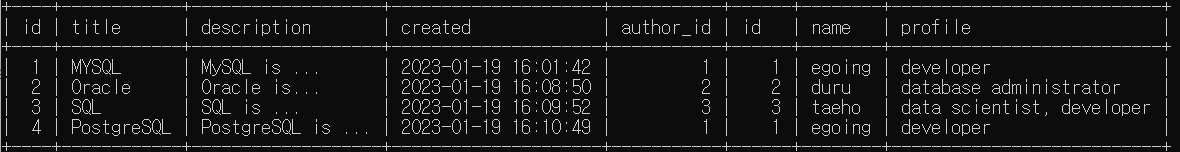